## Proyección de variables

Creditos a [Scikit-Learn](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)

In [13]:
!pip install umap-learn

In [14]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

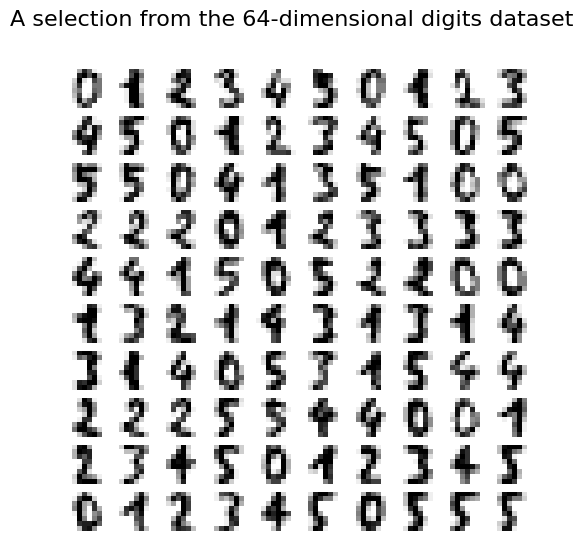

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

## Funciones de ayuda

Vamos a crear una función para poder visualizar las dimensiones obtenidas luego de aplicar nuestro método de reducción de dimensiones por proyección

In [16]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

# Calculo Embeddings

In [17]:
from sklearn.decomposition import TruncatedSVD, PCA, FastICA
from sklearn.manifold import MDS, TSNE
from sklearn.pipeline import make_pipeline
from umap import UMAP

embeddings = {

    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "PCA embedding": PCA(
        n_components=2,
        random_state=0
    ),
    "ICA embedding": FastICA(
        n_components=2,
        random_state=0
    ),
    "MDS embedding": MDS(
        n_components=2,
        n_init=1,
        max_iter=120,
        n_jobs=2),
    "t-SNE embedding": TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "UMAP embedding": UMAP(
        n_components=2
    )
}


In [18]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Truncated SVD embedding...
Computing PCA embedding...
Computing ICA embedding...
Computing MDS embedding...


c:\Users\pablo.nahuel.pelli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Computing t-SNE embedding...


c:\Users\pablo.nahuel.pelli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Computing UMAP embedding...


## Embeddings con TruncatedSVD

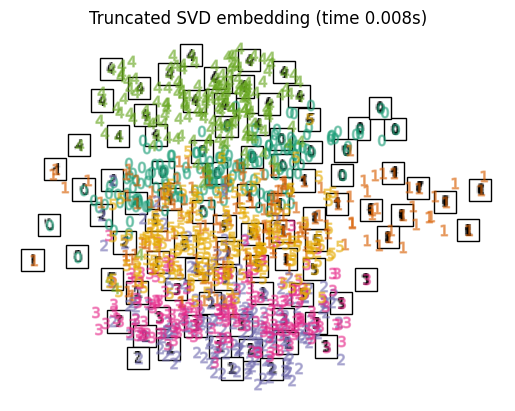

In [19]:
name = 'Truncated SVD embedding'
title = f"{name} (time {timing[name]:.3f}s)"
plot_embedding(projections[name], title)

plt.show()

# Embeddings con PCA

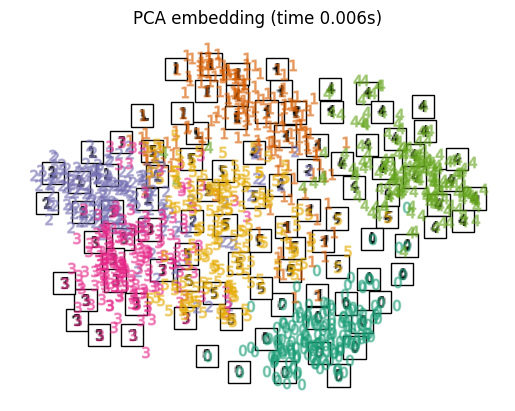

In [20]:
name = 'PCA embedding'
title = f"{name} (time {timing[name]:.3f}s)"
plot_embedding(projections[name], title)

plt.show()

# Embeddings con ICA

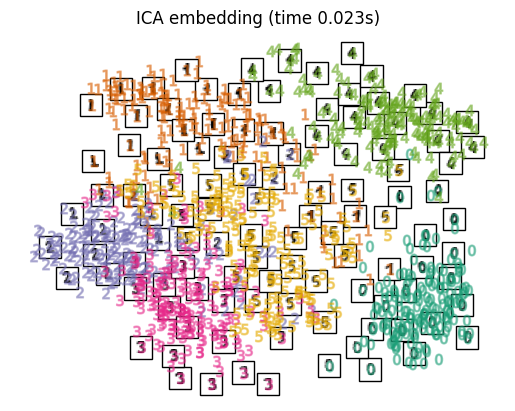

In [21]:
name = 'ICA embedding'
title = f"{name} (time {timing[name]:.3f}s)"
plot_embedding(projections[name], title)

plt.show()

# Embeddings con MDS (Multi Dimensional Scaling)

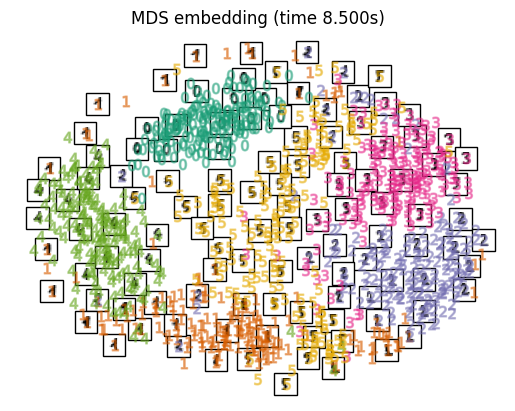

In [22]:
name = 'MDS embedding'
title = f"{name} (time {timing[name]:.3f}s)"
plot_embedding(projections[name], title)

plt.show()

# Embeddings con t-SNE

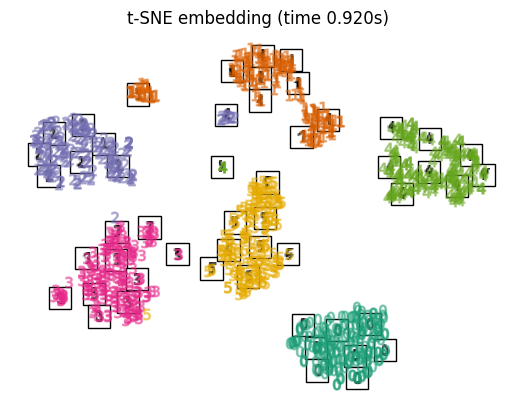

In [23]:
name = 't-SNE embedding'
title = f"{name} (time {timing[name]:.3f}s)"
plot_embedding(projections[name], title)

plt.show()

# Embeddings con UMAP

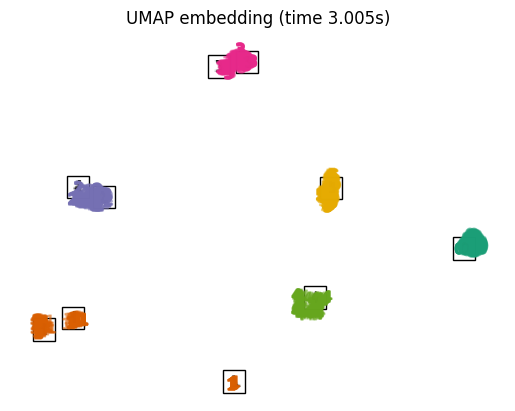

In [24]:
name = 'UMAP embedding'
title = f"{name} (time {timing[name]:.3f}s)"
plot_embedding(projections[name], title)

plt.show()